# Deep Learning-Based Forecasting Deep Learning-Based Forecasting (LSTM)

This project utilises a Long Short-Term Memory (LSTM) neural network to predict housing price trends in Australia from 2026 to 2030. LSTM, a type of recurrent neural network (RNN), is ideal for analyzing time-series data since it can capture long-term dependencies and patterns in past housing price fluctuations.

The model:
- Uses historical house price data to identify market trends.
- Processes five years of past prices to predict the next year's index.
- Produces a forecast for multiple years, helping investors & policymakers plan for future housing market changes.

## 1. Load And Explore Dataset

In [6]:
# import required libaries

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Dataset
df = pd.read_csv("global_housing_market.csv")

# View first few rows
print(df.head())

  Country  Year  House Price Index  Rent Index  Affordability Ratio  \
0     USA  2015         117.454012  116.550001             9.587945   
1     USA  2016         150.807258   51.440915            11.729189   
2     USA  2017         123.194502   70.386040             8.506676   
3     USA  2018         131.423444   91.469020             3.418054   
4     USA  2019         110.461377   56.837048             9.158097   

   Mortgage Rate (%)  Inflation Rate (%)  GDP Growth (%)  \
0           4.493292            1.514121       -0.752044   
1           5.662213            1.880204       -0.545400   
2           2.197469            2.398940        0.930895   
3           4.537724            1.608407       -1.479587   
4           3.700762            1.293249        1.961415   

   Population Growth (%)  Urbanization Rate (%)  Construction Index  
0              -0.796707              85.985284          118.089201  
1              -0.358084              69.127267          111.980515  
2 

## 2. LSTM Housing Price Forecast (2026–2030)



Epoch 1/20

4/4 [==============================] - 3s 6ms/step - loss: 0.4860
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 0.4623
Epoch 3/20
4/4 [==============================] - 0s 5ms/step - loss: 0.4528
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 0.4327
Epoch 5/20
4/4 [==============================] - 0s 6ms/step - loss: 0.4172
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3943
Epoch 7/20
4/4 [==============================] - 0s 5ms/step - loss: 0.3578
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3436
Epoch 9/20
4/4 [==============================] - 0s 6ms/step - loss: 0.2949
Epoch 10/20
4/4 [==============================] - 0s 5ms/step - loss: 0.2670
Epoch 11/20
4/4 [==============================] - 0s 9ms/step - loss: 0.2333
Epoch 12/20
4/4 [==============================] - 0s 7ms/step - loss: 0.2213
Epoch 13/20
4/4 [==============================] - 0s 7ms/step - loss:

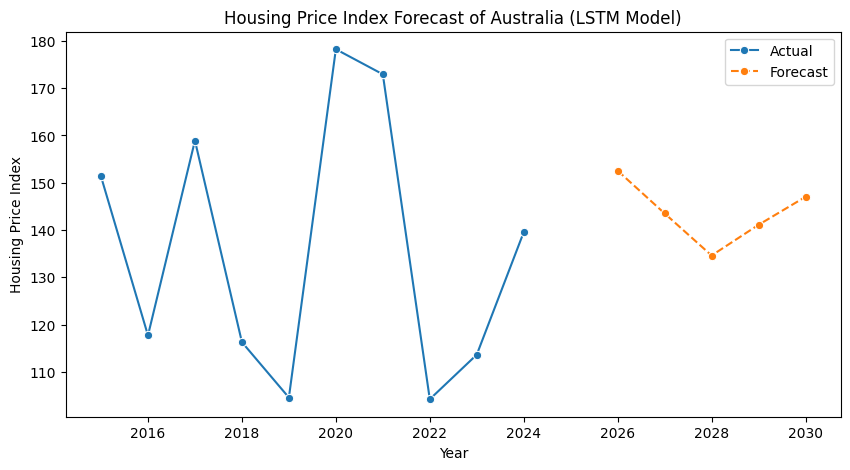

In [3]:
# Filter dataset for Australia
df = df[df["Country"] == "Australia"]  # Keep only Australia's data

# Normalize data
scaler = MinMaxScaler()
df["House_price_index_scaled"] = scaler.fit_transform(df[["House Price Index"]])

# Prepare sequences for LSTM
seq_length = 5  # Use past 5 years to predict next year
X, y = [], []
for i in range(len(df) - seq_length):
    X.append(df["House_price_index_scaled"].values[i:i+seq_length])
    y.append(df["House_price_index_scaled"].values[i+seq_length])
X, y = np.array(X), np.array(y)

# Split into training/testing sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation="relu"),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")

# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

# Predict future housing price index
future_inputs = df["House_price_index_scaled"].values[-seq_length:].reshape(1, seq_length, 1)
predictions_scaled = [model.predict(future_inputs)[0][0]]
for _ in range(4):  # Predict next 4 years iteratively
    future_inputs = np.append(future_inputs[:, 1:, :], [[[predictions_scaled[-1]]]], axis=1)
    predictions_scaled.append(model.predict(future_inputs)[0][0])

# Convert predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions_scaled).reshape(-1, 1))

# Create DataFrame for predicted years
future_years = pd.DataFrame({"Year": [2026, 2027, 2028, 2029, 2030], "Predicted_House_Price_Index": predictions.flatten()})

# Visualization
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Year", y="House Price Index", label="Actual", marker="o")
sns.lineplot(data=future_years, x="Year", y="Predicted_House_Price_Index", label="Forecast", marker="o", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Housing Price Index")
plt.title("Housing Price Index Forecast of Australia (LSTM Model)")
plt.legend()
plt.show()


Epoch 1/20
4/4 [==============================] - 3s 5ms/step - loss: 0.4089
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 0.3565
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 0.2885
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 0.2137
Epoch 5/20
4/4 [==============================] - 0s 7ms/step - loss: 0.1883
Epoch 6/20
4/4 [==============================] - 0s 7ms/step - loss: 0.1501
Epoch 7/20
4/4 [==============================] - 0s 6ms/step - loss: 0.1321
Epoch 8/20
4/4 [==============================] - 0s 6ms/step - loss: 0.1530
Epoch 9/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1417
Epoch 10/20
4/4 [==============================] - 0s 7ms/step - loss: 0.1403
Epoch 11/20
4/4 [==============================] - 0s 7ms/step - loss: 0.1375
Epoch 12/20
4/4 [==============================] - 0s 7ms/step - loss: 0.1338
Epoch 13/20
4/4 [==============================] - 0s 5ms/step - loss: 0.

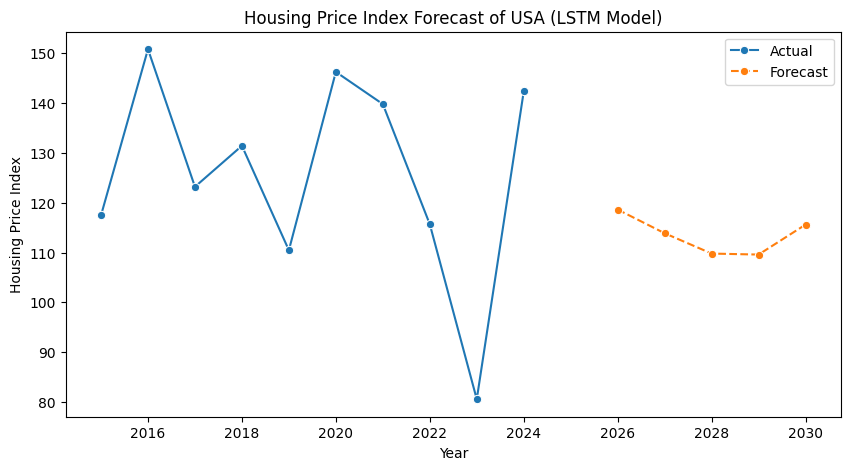

In [5]:
# Load Dataset
df = pd.read_csv("global_housing_market.csv")

# Filter dataset for USA
df = df[df["Country"] == "USA"]  

# Normalize data
scaler = MinMaxScaler()
df["House_price_index_scaled"] = scaler.fit_transform(df[["House Price Index"]])

# Prepare sequences for LSTM
seq_length = 5  # Use past 5 years to predict next year
X, y = [], []
for i in range(len(df) - seq_length):
    X.append(df["House_price_index_scaled"].values[i:i+seq_length])
    y.append(df["House_price_index_scaled"].values[i+seq_length])
X, y = np.array(X), np.array(y)

# Split into training/testing sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation="relu"),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")

# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

# Predict future housing price index
future_inputs = df["House_price_index_scaled"].values[-seq_length:].reshape(1, seq_length, 1)
predictions_scaled = [model.predict(future_inputs)[0][0]]
for _ in range(4):  # Predict next 4 years iteratively
    future_inputs = np.append(future_inputs[:, 1:, :], [[[predictions_scaled[-1]]]], axis=1)
    predictions_scaled.append(model.predict(future_inputs)[0][0])

# Convert predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions_scaled).reshape(-1, 1))

# Create DataFrame for predicted years
future_years = pd.DataFrame({"Year": [2026, 2027, 2028, 2029, 2030], "Predicted_House_Price_Index": predictions.flatten()})

# Visualization
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Year", y="House Price Index", label="Actual", marker="o")
sns.lineplot(data=future_years, x="Year", y="Predicted_House_Price_Index", label="Forecast", marker="o", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Housing Price Index")
plt.title("Housing Price Index Forecast of USA (LSTM Model)")
plt.legend()
plt.show()
